In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import textacy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

# Splitting
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import accuracy_score

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [ ]:
## Import Data

In [3]:
import ast
# ast.literal_eval
# df = get_undersampled(pd.read_csv("data/train_raw.csv"))
# df2 = get_undersampled(pd.read_csv("data/test_raw.csv"))

df = pd.read_csv("data/train_raw.csv")
df2 = pd.read_csv("data/test_raw.csv")

In [14]:
train_tags =df["transcript"]
test_tags = df2["transcript"]

In [7]:
train_labels = df
# labels.head()
test_labels = df

In [42]:
# train_tags.tolist()[0].split(" ")

In [212]:
docs = []
train_corp = textacy.Corpus(lang='en')
for l in tqdm(train_tags.tolist()):
    train_corp.add_text(l)
test_corp = textacy.Corpus(lang='en')
for l in tqdm(test_tags.tolist()):
    test_corp.add_text(l)

100%|██████████| 617/617 [06:00<00:00,  1.71it/s]


In [213]:
## Entire corpus
TR_LEN = len(train_corp)
TE_LEN =len(test_corp)      

In [83]:
# entire_corpus = textacy.Corpus(lang='en')
# for l in train_tags.tolist()+test_tags.tolist():
#     entire_corpus.add_text(' '.join(l))

In [24]:
# len(entire_corpus)

In [49]:
# list(test_corp[0].tokens)

## Preprocess Data - Without combining

In [216]:
def tf_idf_corpus(corpus):
    vectorizer = textacy.Vectorizer(
        tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
        min_df=2, max_df=0.95)
    doc_term_matrix = vectorizer.fit_transform(
        (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
         for doc in tqdm(corpus)))
    return doc_term_matrix
X = tf_idf_corpus(train_corp)
X_test = tf_idf_corpus(test_corp)

100%|██████████| 617/617 [00:08<00:00, 71.69it/s]


## vectorize data with combining

In [134]:
# def tf_idf_corpus(corpus):
#     vectorizer = textacy.Vectorizer(
#         tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
#         min_df=2, max_df=0.95)
#     doc_term_matrix = vectorizer.fit_transform(
#         (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
#          for doc in corpus))
#     return doc_term_matrix
# X = tf_idf_corpus(entire_corpus)
# X_train=X[:TR_LEN]
# X_test = X[TR_LEN:]

In [ ]:
# X_test.shape

In [85]:
# def get_logreg_results(X_train, X_test, y_train, y_test):
#     print("Training Logistic Regression")
#     clf = LogisticRegression()
#     skf = StratifiedKFold(n_splits=5)
    
#     scores = []
#     f = 0
#     for train_index, test_index in skf.split(X_train, y_train):
#         X_tr, X_t = X_train[train_index], X_train[test_index]
#         y_tr, y_t = y_train[train_index], y_train[test_index]
        
#         clf.fit(X_tr, y_tr)
#         scores.append(clf.score(X_t, y_t))
#         print("Fold {}: {}".format(f+1, scores[-1]))
#         f+=1
#     print("Logistic cross-validation accuracy: {}".format(np.mean(scores)))
    
#     clf.fit(X_train, y_train)
#     print("Logistic accuracy on the test set: {}".format(accuracy_score(y_test, clf.predict(X_test))))
    
# def get_svm_results(X_train, X_test, y_train, y_test):
#     print("Training SVM")

#     clf = SVC(kernel='linear')
#     skf = StratifiedKFold(n_splits=5)
    
#     scores = []
#     f = 0
#     for train_index, test_index in skf.split(X_train, y_train):
#         X_tr, X_t = X_train[train_index], X_train[test_index]
#         y_tr, y_t = y_train[train_index], y_train[test_index]
        
#         clf.fit(X_tr, y_tr)
#         scores.append(clf.score(X_t, y_t))
#         print("Fold {}: {}".format(f+1, scores[-1]))
#         f+=1
#     print("SVM cross-validation accuracy: {}".format(np.mean(scores)))
    
#     clf.fit(X_train, y_train)
#     print("SVM accuracy on the test set: {}".format(accuracy_score(y_test, clf.predict(X_test))))


In [217]:
y_train = train_labels["label"].as_matrix()
y_test = test_labels["label"].as_matrix()

TypeError: list indices must be integers or slices, not str

In [207]:
# type(X_train)

## Undersampled

In [122]:
# get_logreg_results(X_train, X_test, y_train, y_test)

In [123]:
# get_svm_results(X_train, X_test, y_train, y_test)

## Not Undersampled

In [86]:
# get_logreg_results(X, X_test, y_train, y_test)

In [87]:
# get_svm_results(X_train, X_test, y_train, y_test)

In [88]:
#  def get_undersampled(df, threshold=200, window=10):
#         indices = df['label'].value_counts()[df['label'].value_counts() > threshold].index.tolist()

#         for ind in indices:
#             over_df = df[df['label'] == ind].reset_index(drop=True)
#             df = df.drop(df[df['label'] == ind].index)
#             to_drop = np.random.randint(threshold-window, 
#                                         threshold+window)

#             trans_ids = np.random.choice(range(len(over_df)),
#                                          to_drop)

#             dfs_to_add = over_df.iloc[trans_ids]
#             df = pd.concat([df, dfs_to_add]).reset_index(drop=True)


#         # Shuffle result
#         df = df.sample(frac=1).reset_index(drop=True)

#         return df

# CNN Text Classification, no undersamplng

In [71]:
import gensim
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import random

In [208]:
# !cp train_5500.label train_5500.label.txt

In [312]:
# flatten = lambda l: [item for sublist in l for item in sublist]
# def flatten2(l):
#     res = []
#     for elem in l:
#         for item in elem.split(' '):
# #             a.append(item)
#             res.append(item)
#     return res
            

In [330]:
# data = open('train_5500.label.txt', 'r', encoding='latin-1').readlines()

# data = [[d.split(':')[1][:-1], d.split(':')[0]] for d in data]

# X_2, y_2 = list(zip(*data))
# vocab = list(set(flatten2(X_2)))#converts sentences into sequence of characters, and finds unique set of characters
# X_2 = [i.split(' ') for i in X_2 ]
# ### Num masking 

# Create Vocabulary of entire dataset

In [ ]:
a = {}
res =[a.update(train_corp[i].to_bag_of_terms(ngrams=1, as_strings=True))  for i in tqdm(range(len(train_corp)))]

# Create Vocab of features

In [218]:
word2index={'<PAD>': 0, '<UNK>': 1}
for key in tqdm(a.keys()):
    if key not in word2index:
        word2index[key] = len(word2index)
index2word = {v:k for k, v in word2index.items()}#loop through sets, and set the value as index, and key as value

# word2index2={'<PAD>': 0, '<UNK>': 1}
# for key in vocab:
#     if key not in word2index2:
#         word2index2[key] = len(word2index2)
# index2word2 = {v:k for k, v in word2index2.items()}#loop through sets, and set the value as index, and key as value

100%|██████████| 15567/15567 [00:00<00:00, 484543.57it/s]


In [162]:
train_labels = df["label"].tolist()

# Create Label Vocab

In [219]:
target2index = {}

for cl in set(train_labels):
    if target2index.get(cl) is None:
        target2index[cl] = len(target2index)# assign an index to unique labels

index2target = {v:k for k, v in target2index.items()}


# target2index2 = {}

# for cl in set(y_2):
#     if target2index2.get(cl) is None:
#         target2index2[cl] = len(target2index2)# assign an index to unique labels

# index2target2 = {v:k for k, v in target2index2.items()}

In [63]:
# word2index2

In [220]:
X = []
X+=[list(train_corp[i].tokens) for i in tqdm(range(len(train_corp)))]

100%|██████████| 1850/1850 [00:08<00:00, 219.77it/s]


In [67]:
# X[0]

In [229]:
def getBatch(batch_size, train_data):
    random.shuffle(train_data)
    sindex = 0
    eindex = batch_size
    while eindex < len(train_data):
        batch = train_data[sindex: eindex]
        temp = eindex
        eindex = eindex + batch_size
        sindex = temp
        yield batch
    
    if eindex >= len(train_data):
        batch = train_data[sindex:]
        yield batch

def pad_to_batch(batch):
    x,y = zip(*batch)
    max_x = max([s.size(1) for s in x])
    max_x = max(11,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def pad_sample(batch):
    max_x = max([s.size(1) for s in batch])
#     max_x = max(5,max_x)

    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
#             print(x[i].size(1))
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

def prepare_sequence(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence_textacy(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[str(w)] if to_index.get((str(w))) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))
def prepare_sequence2(seq, to_index):
    '''
    Converts list of tokens in to list of indicies
    '''
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))

In [96]:
# y_2[0]

In [266]:
# list(zip(X_2,y_2))[0]

('manner How did serfdom develop in and then leave Russia ?', 'DESC')

In [97]:
# check = list(zip(X_2,y_2))
# print([w for w in check[0][0]])
# print(word2index2.get('n'))
# list(map(lambda w: word2index2[w] if word2index2.get(w) is not None else word2index2["<UNK>"], check[0][0]))

In [98]:
# prepare_sequence(X_2[0][0], word2index2).view(1, -1)

In [99]:
# word2index2['m']

In [222]:
USE_CUDA = torch.cuda.is_available()
# gpus = [0]
# torch.cuda.set_device(gpus[0])

FloatTensor = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if USE_CUDA else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if USE_CUDA else torch.ByteTensor

In [101]:
# word2index[str(X[0][0])]

In [223]:
# X
prepare_sequence_textacy(X[4], word2index)

Variable containing:
     1
     1
   723
  ⋮   
  2559
     1
     1
[torch.LongTensor of size 3572]

In [224]:
X_p, y_p = [], []
for pair in tqdm(zip(X,train_labels)):
    X_p.append(prepare_sequence_textacy(pair[0], word2index).view(1, -1))
#     print(X_p)
    y_p.append(Variable(LongTensor([target2index[pair[1]]])).view(1, -1))
    
data_p = list(zip(X_p, y_p))
random.shuffle(data_p)

train_data = data_p[: int(len(data_p) * 0.8)]
test_data = data_p[int(len(data_p) * 0.8):]

1850it [00:15, 119.28it/s]


In [187]:
len(test_data)

20

In [109]:
# test_data[9]

In [ ]:
# prepare for dummy dataset

In [110]:
# X_p, y_p = [], []
# for pair in zip(X_2,y_2):
#     X_p.append(prepare_sequence(pair[0], word2index2).view(1, -1))
#     y_p.append(Variable(LongTensor([target2index2[pair[1]]])).view(1, -1))


# data_p2 = list(zip(X_p, y_p))
# # print([i[0].shape[1] for i in data_p2 if i[0].shape[1] < 4])
# # print(data_p2)
# # random.shuffle(data_p2)

# train_data2 = data_p2[: int(len(data_p) * 0.9)]#BE CAREFUL WITH REUSING VARIABLES
# test_data2 = data_p2[int(len(data_p) * 0.9):]

In [111]:
# test_data2[0][0]

## Load vectors

In [112]:
model2 = gensim.models.KeyedVectors.load_word2vec_format('/Users/andrewmendez1/Documents/CornellTech/Spring2018/CS5304/assign4/project/home/data/GoogleNews-vectors-negative300.txt', binary=False)

In [225]:
pretrained = []
for key in tqdm(index2word.keys()):
    '''
    Here for all the words in vocab, return index, 
    then find word embedding associated with that word
    
    NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
    VALUES GUARENTEED TO BE IN ASCENDING ORDER
    '''
#     print(key)
    try:
#         print(index2word[key],model[index2word[key]].shape)
        pretrained.append(model2[index2word[key]])
    except:
        print("Random")
        pretrained.append(np.random.randn(300))
        
pretrained_vectors = np.vstack(pretrained)

 18%|█▊        | 2784/15569 [00:00<00:00, 13905.54it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 22%|██▏       | 3467/15569 [00:00<00:01, 10239.56it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 32%|███▏      | 4969/15569 [00:00<00:01, 8788.76it/s] 

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 44%|████▍     | 6841/15569 [00:00<00:00, 8935.55it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 55%|█████▌    | 8581/15569 [00:01<00:00, 8434.39it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 60%|█████▉    | 9327/15569 [00:01<00:00, 8320.31it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 69%|██████▉   | 10705/15569 [00:01<00:00, 7494.71it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 78%|███████▊  | 12118/15569 [00:01<00:00, 7418.28it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 82%|████████▏ | 12757/15569 [00:01<00:00, 7042.21it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

 89%|████████▉ | 13834/15569 [00:02<00:00, 6757.76it/s]


Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Rando

 97%|█████████▋| 15036/15569 [00:02<00:00, 6624.19it/s]

Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

100%|██████████| 15569/15569 [00:02<00:00, 6639.82it/s]


Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random
Random

In [ ]:
## For dummy dataset
# pretrained = []
# for key in index2word2.keys():
#     '''
#     Here for all the words in vocab, return index, 
#     then find word embedding associated with that word
    
#     NOTE: THIS ONLY WORKS BECAUSE WHEN MAKING WORD2INDEX, 
#     VALUES GUARENTEED TO BE IN ASCENDING ORDER
#     '''
# #     print(key)
#     try:
# #         print(index2word[key],model[index2word2[key]].shape)
#         pretrained.append(model2[index2word[key]])
#     except:
#         print("Random")
#         pretrained.append(np.random.randn(300))
        
# pretrained_vectors = np.vstack(pretrained)

In [358]:
# train_data2[5]

In [175]:
len(train_data)

80

In [230]:
class  CNNClassifier(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, output_size, kernel_dim=100, kernel_sizes=(2, 3, 4), dropout=0.5):
        super(CNNClassifier,self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(1, kernel_dim, (K, embedding_dim)) for K in kernel_sizes])

        # kernal_size = (K,D) 
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * kernel_dim, output_size)
    
    
    def init_weights(self, pretrained_word_vectors, is_static=False):
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
        if is_static:
            self.embedding.weight.requires_grad = False


    def forward(self, inputs, is_training=False):
        inputs = self.embedding(inputs).unsqueeze(1) # (B,1,T,D)
        inputs = [F.relu(conv(inputs)).squeeze(3) for conv in self.convs] #[(N,Co,W), ...]*len(Ks)
        inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs] #[(N,Co), ...]*len(Ks)

        concated = torch.cat(inputs, 1)

        if is_training:
            concated = self.dropout(concated) # (N,len(Ks)*Co)
        out = self.fc(concated) 
        return F.log_softmax(out,1)

In [ ]:
# EPOCH = 20
# BATCH_SIZE = 10
# KERNEL_SIZES = [5,10,15]
# KERNEL_DIM = 100
# LR = 0.001

In [231]:
EPOCH = 20
BATCH_SIZE = 2
KERNEL_SIZES = [11,21,31]
KERNEL_DIM = 100
LR = 0.001

model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [232]:
def acc():
    accuracy = 0
    for test in test_data:
        if test[0].shape[1]>3:# bug I need to fix
            pred = model(test[0]).max(1)[1]
            pred = pred.data.tolist()[0]
            target = test[1].data.tolist()[0][0]
            if pred == target:
                accuracy += 1

    print(accuracy/len(test_data) * 100)
def f1():
    predictions= []
    y_test=[]
    for i,test in enumerate(getBatch(1, test_data)):
        inputs,targets = pad_to_batch(test)
#         if test[0].shape[1]>3:# bug I need to fix
        predictions.append(model(inputs).max(1)[1].data[0])
#         print(targets.data.tolist()[0])
        y_test.append(targets.data.tolist()[0])
#         print(predictions[-1],'==',y_test[-1])
            
    f1 = f1_score(y_test, predictions, average="micro")
    print("Naive F1 score: {}".format(f1))
    return f1
    

In [233]:
len(test_data)

370

In [153]:
# for i in [enumerate(getBatch(10, test_data))in range(len(test_data))]:
#     print(i)

False


In [199]:
from tqdm import tqdm 

In [235]:
f1s= []
for epoch in tqdm(range(EPOCH)):
    losses = []
    for i,batch in tqdm(enumerate(getBatch(BATCH_SIZE, train_data))):
#         print(batch)
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
#         print(inputs.shape)
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
        losses.append(loss.data.tolist()[0])
        loss.backward()
        
        #for param in model.parameters():
        #    param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
    if epoch%1==0:
        print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
        losses = []
        f1s.append(f1())
        print(f1s[-1])


  0%|          | 0/20 [00:00<?, ?it/s]

0it [00:00, ?it/s]

1it [00:02,  2.77s/it]

2it [00:06,  3.11s/it]

3it [00:11,  3.88s/it]
4it [00:15,  3.98s/it]
5it [00:19,  3.82s/it]
6it [00:23,  3.86s/it]
7it [00:29,  4.16s/it]
8it [00:33,  4.24s/it]
9it [00:39,  4.37s/it]
10it [00:44,  4.44s/it]
11it [00:48,  4.38s/it]
12it [00:53,  4.49s/it]
13it [00:58,  4.49s/it]
14it [01:03,  4.57s/it]
15it [01:08,  4.53s/it]
16it [01:11,  4.47s/it]
17it [01:14,  4.38s/it]
18it [01:18,  4.36s/it]
19it [01:21,  4.31s/it]
20it [01:24,  4.23s/it]
21it [01:30,  4.33s/it]
22it [01:35,  4.34s/it]
23it [01:38,  4.30s/it]
24it [01:42,  4.28s/it]
25it [01:48,  4.34s/it]
26it [01:53,  4.36s/it]
27it [01:59,  4.41s/it]
28it [02:01,  4.34s/it]
29it [02:05,  4.32s/it]
30it [02:09,  4.33s/it]
31it [02:13,  4.31s/it]
32it [02:14,  4.21s/it]
33it [02:18,  4.19s/it]
34it [02:21,  4.17s/it]
35it [02:25,  4.16s/it]
36it [02:32,  4.23s/it]
37it [02:38,  4.27s/it]
38it [02:42,  4.27s/it]
39it [02:43,  4.20s/it]
40it [02:4

294it [20:57,  4.28s/it]
295it [20:59,  4.27s/it]
296it [21:03,  4.27s/it]
297it [21:08,  4.27s/it]
298it [21:12,  4.27s/it]
299it [21:16,  4.27s/it]
300it [21:19,  4.26s/it]
301it [21:25,  4.27s/it]
302it [21:28,  4.27s/it]
303it [21:29,  4.26s/it]
304it [21:32,  4.25s/it]
305it [21:35,  4.25s/it]
306it [21:43,  4.26s/it]
307it [21:54,  4.28s/it]
308it [22:02,  4.29s/it]
309it [22:05,  4.29s/it]
310it [22:10,  4.29s/it]
311it [22:13,  4.29s/it]
312it [22:16,  4.28s/it]
313it [22:23,  4.29s/it]
314it [22:28,  4.29s/it]
315it [22:37,  4.31s/it]
316it [22:40,  4.30s/it]
317it [22:44,  4.30s/it]
318it [22:49,  4.31s/it]
319it [22:52,  4.30s/it]
320it [22:59,  4.31s/it]
321it [23:03,  4.31s/it]
322it [23:07,  4.31s/it]
323it [23:11,  4.31s/it]
324it [23:15,  4.31s/it]
325it [23:19,  4.31s/it]
326it [23:22,  4.30s/it]
327it [23:27,  4.30s/it]
328it [23:28,  4.29s/it]
329it [23:31,  4.29s/it]
330it [23:35,  4.29s/it]
331it [23:41,  4.29s/it]
332it [23:48,  4.30s/it]
333it [23:53,  4.30s/it]


586it [41:38,  4.26s/it]
587it [41:41,  4.26s/it]
588it [41:42,  4.26s/it]
589it [41:45,  4.25s/it]
590it [41:50,  4.26s/it]
591it [41:55,  4.26s/it]
592it [41:58,  4.25s/it]
593it [42:02,  4.25s/it]
594it [42:05,  4.25s/it]
595it [42:06,  4.25s/it]
596it [42:11,  4.25s/it]
597it [42:13,  4.24s/it]
598it [42:16,  4.24s/it]
599it [42:21,  4.24s/it]
600it [42:22,  4.24s/it]
601it [42:26,  4.24s/it]
602it [42:29,  4.24s/it]
603it [42:32,  4.23s/it]
604it [42:36,  4.23s/it]
605it [42:42,  4.23s/it]
606it [42:44,  4.23s/it]
607it [42:46,  4.23s/it]
608it [42:51,  4.23s/it]
609it [42:55,  4.23s/it]
610it [42:59,  4.23s/it]
611it [43:02,  4.23s/it]
612it [43:06,  4.23s/it]
613it [43:10,  4.23s/it]
614it [43:12,  4.22s/it]
615it [43:15,  4.22s/it]
616it [43:18,  4.22s/it]
617it [43:24,  4.22s/it]
618it [43:27,  4.22s/it]
619it [43:31,  4.22s/it]
620it [43:37,  4.22s/it]
621it [43:40,  4.22s/it]
622it [43:44,  4.22s/it]
623it [43:46,  4.22s/it]
624it [43:49,  4.21s/it]
625it [43:54,  4.21s/it]


[0/20] mean_loss : 2.50


RuntimeError: Calculated input size: (11 x 300). Kernel size: (21 x 300). Kernel size can't greater than actual input size at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/THNN/generic/SpatialConvolutionMM.c:46

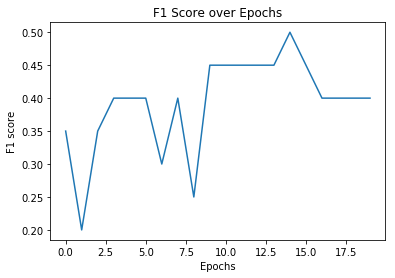

In [211]:
plt.plot(range(len(f1s)),f1s)
plt.title("F1 Score over Epochs")
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.savefig("F1 Score over Epochs.png")